In [ ]:
!pip install statannotations

In [2]:
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

In [11]:
sns.set(rc={"figure.figsize": (14, 8)})

In [4]:
df = sns.load_dataset("taxis")
df.head(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [5]:
df.groupby(by="pickup_borough").agg(median_total_fare=("total", "median"))

,median_total_fare
pickup_borough,
Bronx,16.80
Brooklyn,14.69
Manhattan,13.80
Queens,23.80


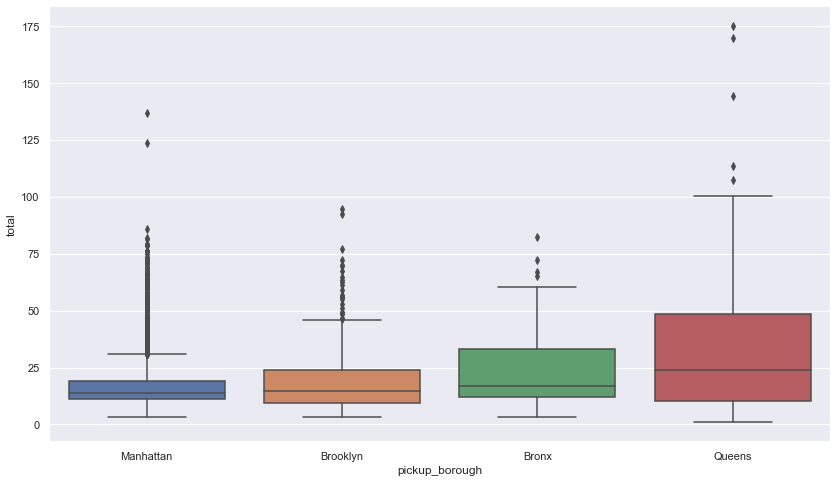

In [12]:
x = "pickup_borough"
y = "total"
cities = ["Manhattan", "Brooklyn", "Bronx", "Queens"]
ax = sns.boxplot(data=df, x=x, y=y, order=cities)

In [7]:
from itertools import combinations

cities = ["Manhattan", "Brooklyn", "Bronx", "Queens"]
pairs = list(combinations(cities, r=2))
pairs

[('Manhattan', 'Brooklyn'),
 ('Manhattan', 'Bronx'),
 ('Manhattan', 'Queens'),
 ('Brooklyn', 'Bronx'),
 ('Brooklyn', 'Queens'),
 ('Bronx', 'Queens')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Manhattan vs. Brooklyn: Mann-Whitney-Wilcoxon test two-sided, P_val:7.225e-01 U_stat=9.979e+05
Brooklyn vs. Bronx: Mann-Whitney-Wilcoxon test two-sided, P_val:1.992e-02 U_stat=1.608e+04
Bronx vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:1.676e-02 U_stat=2.768e+04
Manhattan vs. Bronx: Mann-Whitney-Wilcoxon test two-sided, P_val:5.785e-04 U_stat=2.082e+05
Brooklyn vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:3.666e-12 U_stat=9.335e+04
Manhattan vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:2.929e-30 U_stat=1.258e+06


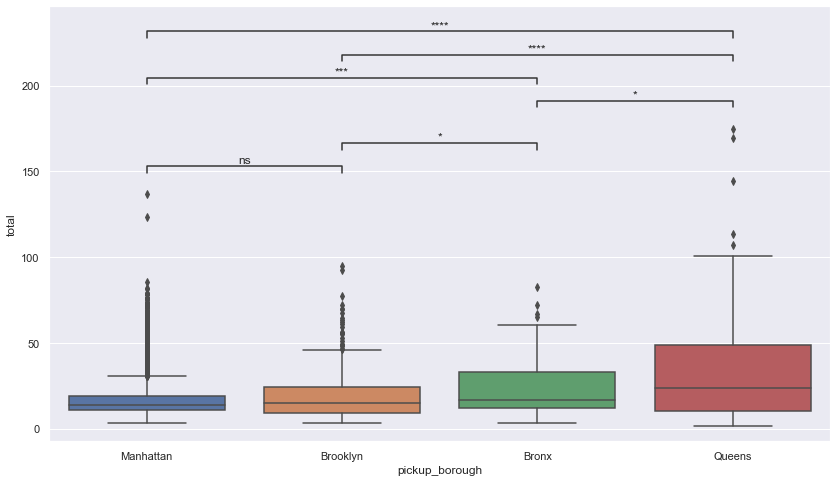

In [13]:
from statannotations.Annotator import Annotator

ax = sns.boxplot(data=df, x=x, y=y, order=cities)
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=cities)
annotator.configure(test="Mann-Whitney")
annotator.apply_and_annotate()
plt.show()

Manhattan vs. Brooklyn: Mann-Whitney-Wilcoxon test two-sided, P_val:7.225e-01 U_stat=9.979e+05
Brooklyn vs. Bronx: Mann-Whitney-Wilcoxon test two-sided, P_val:1.992e-02 U_stat=1.608e+04
Bronx vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:1.676e-02 U_stat=2.768e+04
Manhattan vs. Bronx: Mann-Whitney-Wilcoxon test two-sided, P_val:5.785e-04 U_stat=2.082e+05
Brooklyn vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:3.666e-12 U_stat=9.335e+04
Manhattan vs. Queens: Mann-Whitney-Wilcoxon test two-sided, P_val:2.929e-30 U_stat=1.258e+06


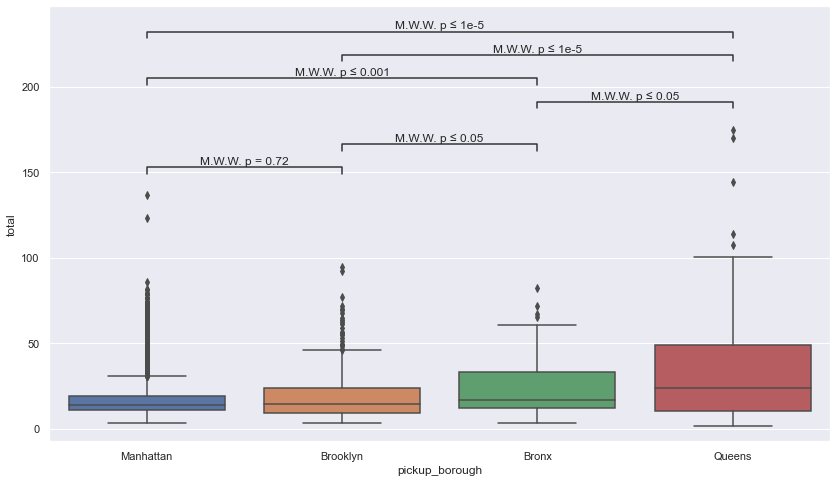

In [14]:
ax = sns.boxplot(data=df, x=x, y=y, order=cities)
annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=cities)
annotator.configure(test="Mann-Whitney", text_format="simple")
annotator.apply_and_annotate()
plt.show()